In [ ]:
'''
7개 class
train : test = 7 : 3
max_len = 256, batchsize = 32
'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/지식재산/물류 특허 분류용 데이터셋.csv')

In [ ]:
data

,출원번호,초록,메인 ipc코드,서브 ipc코드1,서브 ipc코드2,메인 ipc코드.1
0,1019980016378,물류관리 시스템 및 그 제어방법에 대해 개시하고 있다. 본 발명에 의한 물류관리 시...,G06K,NaN,NaN,G06K
1,1019980033073,"본 발명은 크레인, 대차, 지게차 및 차량 등의 물류기기를 제어 관리하는 시스템에 ...",G06Q,NaN,NaN,G06Q
2,1019970047345,물류 배송 관리에서 각 점포 및 체인점 등의 발주 요구에 따라 해당하는 상품을 배송...,G06Q,NaN,NaN,G01S
3,1019990052777,이 발명은 이동 통신망을 이용한 물류 운송 시스템 및 그 방법을 개시한다. 고객이 ...,G01S,NaN,NaN,G16C
4,1020070009550,본 발명은 제조사에서 출시되어 물류사의 물류센터를 거쳐 유통사에 배송되는 물류의 전...,G16C,NaN,NaN,G01G
...,...,...,...,...,...,...
1281,1020000018226,"본 발명은 무선데이터통신망을 이용한 벤딩 머신 시스템에 관한 것으로, 더욱 상세하게...",G07F,NaN,NaN,NaN
1282,1020100047651,"본 발명에 따른 전자부품 분류장치는, 요구되는 특성을 가지는 전자부품이 수납된 위치...",G01G,NaN,NaN,NaN
1283,1020050136297,롤러의 마모 및 오염을 방지할 수 있음은 물론 신뢰성을 향상 시킬 수 있는 종이매체...,G07D,NaN,NaN,NaN
1284,1020090095917,지엽류를 퇴적 트레이에 구부러지지 않게 정렬된 상태로 배출하여 집적하는 지엽류 배출...,G07D,NaN,NaN,NaN


In [ ]:
num_of_unique_values = data['메인 ipc코드'].nunique()
num_of_unique_values

40

In [ ]:
value_counts = data['메인 ipc코드'].value_counts()

df_value_counts = pd.DataFrame(value_counts).reset_index()
df_value_counts.columns = ['메인 ipc 코드', '개수']

display(df_value_counts.head(10))

,메인 ipc 코드,개수
0,G07F,262
1,G07D,196
2,G01G,181
3,G06Q,119
4,G05D,72
5,G16C,69
6,G05B,56
7,G07C,38
8,G08G,34
9,G09F,30


In [ ]:
'''
7개 class
10번 진행

랜덤하게 50개 뽑아서 350개의 데이터를 생성 => train : test = 3 : 1로 진행
'''

'\n7개 class\n10번 진행\n\n랜덤하게 50개 뽑아서 350개의 데이터를 생성 => train : test = 3 : 1로 진행\n'

In [ ]:
values_to_find = ['G07F', 'G07D', 'G01G', 'G06Q','G05D','G16C','G05B']

new_data = data[data['메인 ipc코드'].isin(values_to_find)]

In [ ]:
new_data

,출원번호,초록,메인 ipc코드,서브 ipc코드1,서브 ipc코드2,메인 ipc코드.1
1,1019980033073,"본 발명은 크레인, 대차, 지게차 및 차량 등의 물류기기를 제어 관리하는 시스템에 ...",G06Q,NaN,NaN,G06Q
2,1019970047345,물류 배송 관리에서 각 점포 및 체인점 등의 발주 요구에 따라 해당하는 상품을 배송...,G06Q,NaN,NaN,G01S
4,1020070009550,본 발명은 제조사에서 출시되어 물류사의 물류센터를 거쳐 유통사에 배송되는 물류의 전...,G16C,NaN,NaN,G01G
5,1020140055406,물류 식별 코드 관리 장치 및 방법이 개시된다. 본 발명에 따른 물류 식별 코드 ...,G01G,NaN,NaN,G05D
6,1019960067219,본 발명의 물류용기 관리 및 사용시스템은 복수업체에 의한 다종류의 물류용기를 사용하...,G06Q,G06K,NaN,G09F
...,...,...,...,...,...,...
1278,1019950041903,본 발명은 전자식 금전등록기(ECR) 또는 판매시점관리시스템에 관한 것이다.본 발명...,G06Q,NaN,NaN,NaN
1281,1020000018226,"본 발명은 무선데이터통신망을 이용한 벤딩 머신 시스템에 관한 것으로, 더욱 상세하게...",G07F,NaN,NaN,NaN
1282,1020100047651,"본 발명에 따른 전자부품 분류장치는, 요구되는 특성을 가지는 전자부품이 수납된 위치...",G01G,NaN,NaN,NaN
1283,1020050136297,롤러의 마모 및 오염을 방지할 수 있음은 물론 신뢰성을 향상 시킬 수 있는 종이매체...,G07D,NaN,NaN,NaN


In [ ]:
# 가정: data는 원본 데이터 프레임, '초록'은 텍스트 칼럼
abstract_lengths = new_data['초록'].apply(len)  # 각 텍스트의 길이 계산
average_length = abstract_lengths.mean()  # 평균 길이 계산

print(average_length)

min_length = abstract_lengths.min()  # 가장 짧은 길이 찾기

print(min_length)

max_length = abstract_lengths.max()

print(max_length)

447.39267015706804
82
1520


In [ ]:
# 가정: data는 원본 데이터 프레임, '초록'은 텍스트 칼럼
min_length_row = new_data[new_data['초록'].apply(len) == new_data['초록'].apply(len).max()]

print(min_length_row)

              출원번호                                                 초록  \
843  1020080105374  본 발명은 이와 같은 종래의 제반 문제점을 해소하기 위하여 안출한 것으로, 종량제 ...   

    메인 ipc코드 서브 ipc코드1 서브 ipc코드2 메인 ipc코드.1  
843     G05D       NaN       NaN        NaN  


리뷰의 최대 길이 : 955
리뷰의 평균 길이 : 447.39267015706804


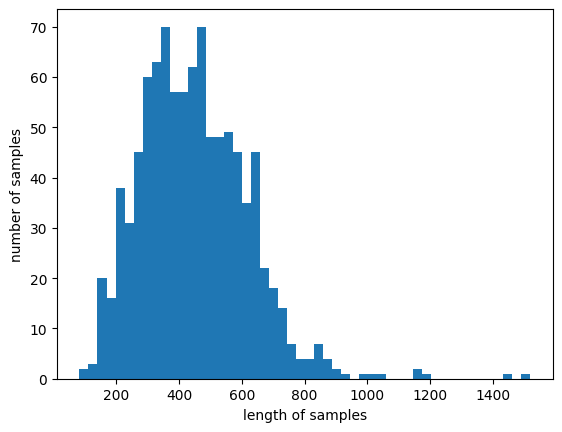

In [ ]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(new_data['초록']) for review in new_data['초록']))
print('리뷰의 평균 길이 :',sum(map(len, new_data['초록']))/len(new_data['초록']))
plt.hist([len(review) for review in new_data['초록']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# 가정: data는 원본 데이터 프레임, '메인 ipc코드'는 메인 ipc 코드 칼럼
values_to_find = ['G07F', 'G07D', 'G01G', 'G06Q','G05D','G16C','G05B']

new_data = data[data['메인 ipc코드'].isin(values_to_find)]

for i in range(1, 11):  # 10번 반복
    frames = []  # 개별 IPC 코드에 대한 데이터 프레임을 저장할 리스트
    for code in values_to_find:
        temp_df = new_data[new_data['메인 ipc코드'] == code]  # 해당 IPC 코드를 가진 데이터 선택
        sample_df = temp_df.sample(n=50, replace=False, random_state=np.random.randint(10000))  # 50개 샘플 선택
        frames.append(sample_df)  # 리스트에 샘플 데이터 프레임 추가
    result_df = pd.concat(frames)  # 모든 샘플 데이터 프레임을 하나로 합침

    # 각각의 데이터 프레임을 'data1', 'data2', ... 'data10' 이라는 이름의 전역 변수로 저장
    globals()['data' + str(i)] = result_df


In [ ]:
new_data

,출원번호,초록,메인 ipc코드,서브 ipc코드1,서브 ipc코드2,메인 ipc코드.1
1,1019980033073,"본 발명은 크레인, 대차, 지게차 및 차량 등의 물류기기를 제어 관리하는 시스템에 ...",G06Q,NaN,NaN,G06Q
2,1019970047345,물류 배송 관리에서 각 점포 및 체인점 등의 발주 요구에 따라 해당하는 상품을 배송...,G06Q,NaN,NaN,G01S
4,1020070009550,본 발명은 제조사에서 출시되어 물류사의 물류센터를 거쳐 유통사에 배송되는 물류의 전...,G16C,NaN,NaN,G01G
5,1020140055406,물류 식별 코드 관리 장치 및 방법이 개시된다. 본 발명에 따른 물류 식별 코드 ...,G01G,NaN,NaN,G05D
6,1019960067219,본 발명의 물류용기 관리 및 사용시스템은 복수업체에 의한 다종류의 물류용기를 사용하...,G06Q,G06K,NaN,G09F
...,...,...,...,...,...,...
1278,1019950041903,본 발명은 전자식 금전등록기(ECR) 또는 판매시점관리시스템에 관한 것이다.본 발명...,G06Q,NaN,NaN,NaN
1281,1020000018226,"본 발명은 무선데이터통신망을 이용한 벤딩 머신 시스템에 관한 것으로, 더욱 상세하게...",G07F,NaN,NaN,NaN
1282,1020100047651,"본 발명에 따른 전자부품 분류장치는, 요구되는 특성을 가지는 전자부품이 수납된 위치...",G01G,NaN,NaN,NaN
1283,1020050136297,롤러의 마모 및 오염을 방지할 수 있음은 물론 신뢰성을 향상 시킬 수 있는 종이매체...,G07D,NaN,NaN,NaN


In [ ]:
data1

,출원번호,초록,메인 ipc코드,서브 ipc코드1,서브 ipc코드2,메인 ipc코드.1
868,1019990037739,본 발명은 자동판매기의 함체내에 수용되어진 내용물이 배출장치를 통하여 외부로 배출되...,G07F,NaN,NaN,NaN
1265,1019970051296,"본 발명은 상품 전시실내의 청소시에 투명판의 이면측에 배치한 표시 패널, 및 패널 ...",G07F,G06Q,NaN,NaN
1220,1019980010186,"본 발명은 조리기능을 갖는 자동판매기 및 그 구동제어방법에 관한 것으로서, 냉동식품...",G07F,G06Q,NaN,NaN
138,1019940021523,본 발명은 상품의 변형을 생기게 하지 않고 상품의 수납 효율이 높으며 상품을 보충하...,G07F,NaN,NaN,NaN
545,1019970054339,"본 발명은 쓰레기 봉투 자동판매기에 관한 것으로서, 상부의 투입구(12) 및 하부의...",G07F,G06Q,NaN,NaN
...,...,...,...,...,...,...
376,1020030024930,"본 발명은 (magazine) 분류 이송 장치와 방법에 관한 것으로서, 다이 어태치...",G05B,NaN,NaN,NaN
897,1019950006946,자동제어가능 작업기가 설치되어 있는 다수의 작업스테이션을 포함하는 생산설비를 제어하...,G05B,NaN,NaN,NaN
19,1019960024615,반도체 제조용 물류를 효율적으로 이송시켜 반도체 제조설비 및 이송장치의 가동율을 향...,G05B,NaN,NaN,G01F
23,1019960045090,웨이퍼와 같은 이송물을 공정수행 전 또는 후에 원하는 장소로 자동반...,G05B,NaN,NaN,G03F


In [ ]:
new_data.loc[(new_data['메인 ipc코드'] == "G07F"),'메인 ipc코드'] = 0
new_data.loc[(new_data['메인 ipc코드'] == "G07D"),'메인 ipc코드'] = 1
new_data.loc[(new_data['메인 ipc코드'] == "G01G"),'메인 ipc코드'] = 2
new_data.loc[(new_data['메인 ipc코드'] == "G06Q"),'메인 ipc코드'] = 3
new_data.loc[(new_data['메인 ipc코드'] == "G05D"),'메인 ipc코드'] = 4
new_data.loc[(new_data['메인 ipc코드'] == "G16C"),'메인 ipc코드'] = 5
new_data.loc[(new_data['메인 ipc코드'] == "G05B"),'메인 ipc코드'] = 6

data_list = []
for q, label in zip(new_data['초록'], new_data['메인 ipc코드']):
  data = []
  data.append(q)
  data.append(str(label))

  data_list.append(data)

In [ ]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(data_list, test_size=0.3)

In [ ]:
!pip install mxnet
!pip install gluonnlp==0.8.0
!pip install tqdm pandas
!pip install sentencepiece
!pip install transformers
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.8.0-py3-none-any.whl size=292697 sha256=d4832163ec409b77dc6a0e93b78f1de03963de42bf761fd0c35ef0de372e5dd0
  Stored in directory: /root/.cache/pip/wheels/2d/cc/dc/7ec84dced25f738b8be400101abb67e4b50c905090a51017e4
Successfully built gluonnlp


In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

import os


from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-ibuesrpp/kobert-tokenizer_7403f75ec5e44fe8b290ba8697cfb499
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-ibuesrpp/kobert-tokenizer_7403f75ec5e44fe8b290ba8697cfb499
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4632 sha256=89ca9dd9cc2d78d5ef8dddc5c418b233e42a1f9424b4807b5b690ba19c75622a
  Stored in directory: /tmp/pip-ephem-wheel-cache-v_f0stdx/wheels/e9/1a/3f/a864970e8a169c176befa3c4a1e07aa612f69195907a4045fe
Successfully built kobert_tokenizer


/usr/local/lib/python3.10/dist-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda:0")

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,pad, pair):

        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))


    def __len__(self):
        return (len(self.labels))

In [ ]:
#https://newyearchive.tistory.com/2

class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, vocab=vocab, max_seq_length=max_len, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
max_len = 256
batch_size = 32
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
tok=tokenizer.tokenize

data_train = BERTDataset(dataset_train, 0, 1, tokenizer,vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tokenizer, vocab, max_len, True, False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=7,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

train_dataloader

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_history=[]
test_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    #train_history.append(train_acc / (batch_id+1))

    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))

<ipython-input-21-0cd8b201d8af>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/21 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


epoch 1 batch id 1 loss 1.9338468313217163 train acc 0.1875
epoch 1 train acc 0.22937925170068027


<ipython-input-21-0cd8b201d8af>:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/9 [00:00<?, ?it/s]

epoch 1 test acc 0.28573028673835127


  0%|          | 0/21 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.7198889255523682 train acc 0.3125
epoch 2 train acc 0.5006377551020409


  0%|          | 0/9 [00:00<?, ?it/s]

epoch 2 test acc 0.6618503584229392


  0%|          | 0/21 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 1.2577260732650757 train acc 0.625
epoch 3 train acc 0.7042942176870748


  0%|          | 0/9 [00:00<?, ?it/s]

epoch 3 test acc 0.6967965949820789


  0%|          | 0/21 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.9157317876815796 train acc 0.75
epoch 4 train acc 0.7580782312925171


  0%|          | 0/9 [00:00<?, ?it/s]

epoch 4 test acc 0.7493279569892474


  0%|          | 0/21 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.8283774852752686 train acc 0.75
epoch 5 train acc 0.786139455782313


  0%|          | 0/9 [00:00<?, ?it/s]

epoch 5 test acc 0.7351030465949822
